In [172]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

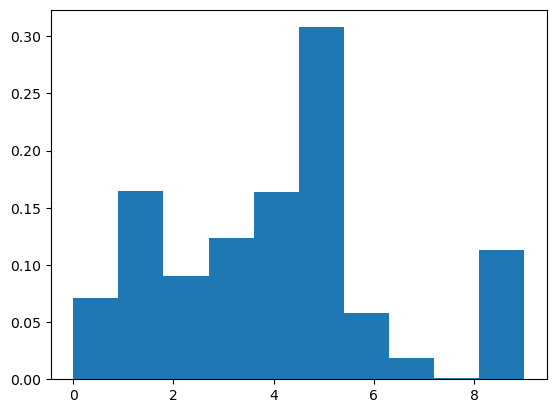

In [173]:
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
figures = weights.argsort()
weights.sort()

W = weights.sum()

points = np.array([weights[:k].sum() / W for k in range(10)])

def rand_fig():
    x = np.random.rand()
    arr = np.array(np.where(points < x))
    return figures[arr.max()]

sample = np.array([rand_fig() for _ in range(1000)])

plt.hist(sample, 10, density = True)
plt.show()

### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

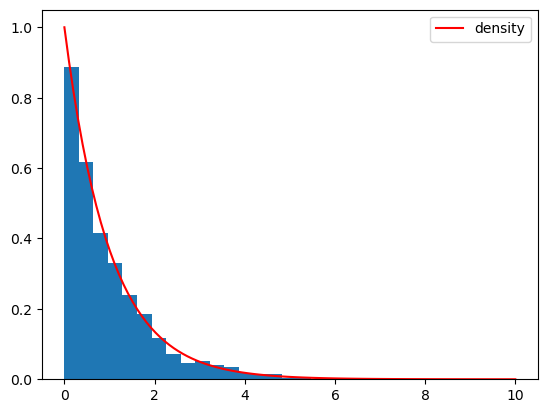

In [174]:
d = 1 # lambda

def p(x):
    return d * np.exp(- d * x)

def Inverse(y):
    return - np.log(1 - y) / d

sample = np.array([Inverse(np.random.rand()) for _ in range(1000)])

x_arr = np.linspace(0, 10 / d, 100)
y_arr = p(x_arr)

plt.hist(sample, 20, density = True)
plt.plot(x_arr, y_arr, c = 'r', label = 'density')
plt.legend()
plt.show()

### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

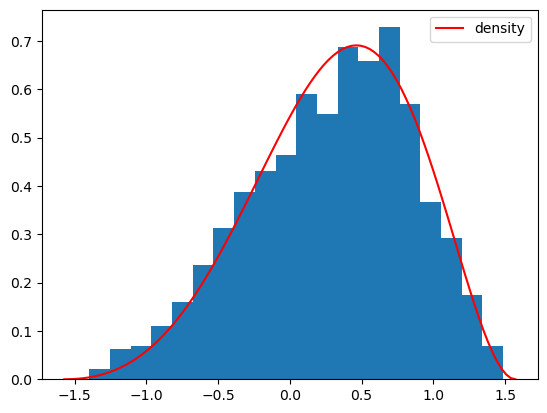

In [175]:
C = 2

def p(x):
    return np.exp(x) * np.cos(x) ** 2

def h(x):
    return np.pi * (x - 0.5)
    
def AR_rand():
    while(True):
        x = h(np.random.rand())
        y = np.random.rand() * C
        if y < p(x):
            return x 

sample = np.array([AR_rand() for _ in range(1000)])

x_arr = np.linspace(- np.pi / 2, np.pi / 2, 100)
y_arr = p(x_arr) / 1.841039121845836 # normalized density

plt.hist(sample, 20, density = True)
plt.plot(x_arr, y_arr, c = 'r', label = 'density')
plt.legend()
plt.show()

### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

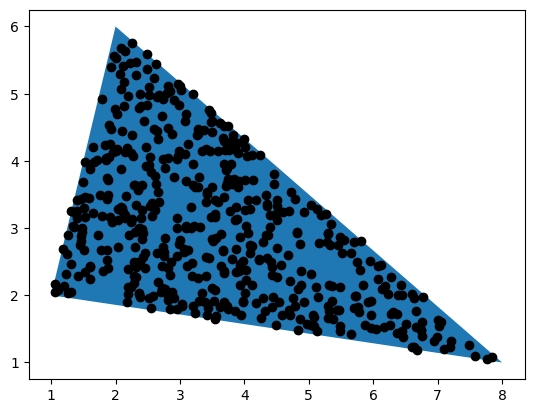

In [176]:
A = np.array([1, 2])
B = np.array([2, 6])
C = np.array([8, 1])

M = (B + C) / 2

def tr_rand():
    x = np.random.rand()
    y = np.random.rand()

    P = A + x * (B - A) + y * (C - A)
    
    if x + y <= 1:
        return P
    if x + y > 1:
        return M - (P - M)

sample = np.array([tr_rand() for _ in range(500)])

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]))
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(sample[:, 0], sample[:, 1], c = 'k')
plt.show()

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

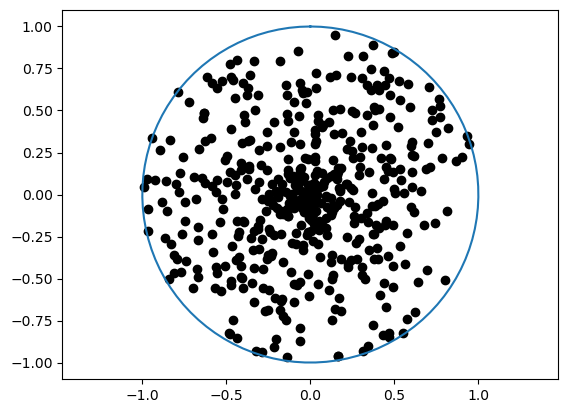

In [177]:
def round_rand():
    r = np.random.rand()
    t = np.random.rand() * 2 * np.pi
    return [r * np.cos(t), r * np.sin(t)]

sample = np.array([round_rand() for _ in range(500)])
plt.scatter(sample[:, 0], sample[:, 1], c = 'k')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

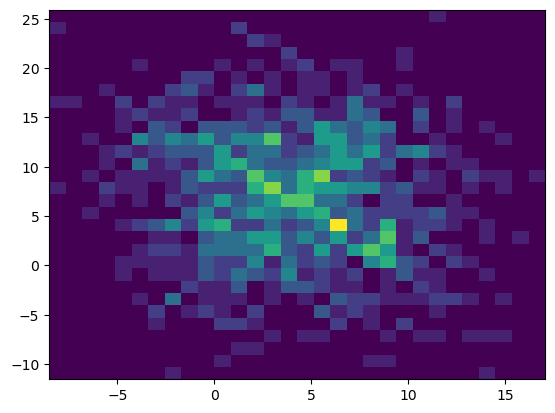

sample mean: [4.04640458 6.95096041]
sample covariance matrix: 
[[19.6039676  -3.48645978]
 [-3.48645978 40.03973373]]

mean error: 0.06751493555522645
covariance matrix error: 0.8281711999738721


In [183]:
n = 1000

def circle_rand():
    x = np.random.rand() - 0.5
    y = np.random.rand() - 0.5

    return np.array([x / np.sqrt(x ** 2 + y**2), y  / np.sqrt(x ** 2 + y ** 2)])

def st_normal_rand():
    u = np.random.rand()
    r = np.sqrt(- 2 * np.log(u))
    return r * circle_rand()

A = np.array([4, 7])
C = np.array([[4.42719, -0.632456], [0., 6.32456]]) # matrix of transformation

def required_rand():
    v = st_normal_rand()
    x = A[0] + C[0, 0] * v[0] + C[0, 1] * v[1]
    y = A[1] + C[1, 0] * v[0] + C[1, 1] * v[1]
    return np.array([x, y])

sample = np.array([required_rand() for _ in range(n)])
x_arr = sample[:, 0]
y_arr = sample[:, 1]

plt.hist2d(x_arr, y_arr, bins = 30)
plt.show()

x_mean = x_arr.mean()
y_mean = y_arr.mean()
x_var  = x_arr.std() ** 2
y_var  = y_arr.std() ** 2
xy_cov = (1 / n) * np.sum(((x_arr - x_mean * np.ones(n)) * (y_arr - y_mean * np.ones(n))))

# errors are with respect to euclidean norms
mean_err = np.sqrt((x_mean - 4) ** 2 + (y_mean - 7) ** 2)
matrix_err = np.sqrt((x_var - 20) ** 2 + 2 * (xy_cov + 4) ** 2 + (y_var - 40) ** 2)

print("sample mean: " + str(np.array([x_mean, y_mean])))
print("sample covariance matrix: \n" + str(np.array([[x_var, xy_cov], [xy_cov, y_var]])))
print("\nmean error: " + str(mean_err))
print("covariance matrix error: " + str(matrix_err))